# Part 1: Web Scraping

In [77]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import random

In [78]:
bibs = [str(i) for i in range(1,55530)]
bibs = random.sample(bibs, 550)
directory = []
for i in bibs:
    driver = webdriver.Chrome()
    url = 'https://results.nyrr.org/event/M2024/result/' + i
    driver.get(url)
    time.sleep(3)
    html_content = driver.page_source
    driver.quit()
    listing = {}
    runners_stat = BeautifulSoup(html_content, 'html.parser')
    
    try:
        listing["Name"] = runners_stat.find_all("div", class_="main-title ng-binding")[0].get_text().split()
        listing["Gender"] = runners_stat.find_all("div", class_="main-title ng-binding")[1].get_text().split()[1][0]
        listing["Age"] = int(runners_stat.find_all("div", class_="main-title ng-binding")[1].get_text().split()[1][1:])
        listing["Pace_Per_Mile"] = runners_stat.find_all("span", class_="label-value ng-binding")[1].get_text()
        listing["05K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[0].find_all('span', class_="label-value ng-binding")[0].get_text() 
        listing["10K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[1].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["15K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[2].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["20K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[3].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["Half"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[4].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["25K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[5].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["30K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[6].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["20M"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[7].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["35K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[8].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["40K"]= runners_stat.find_all('div', class_="form-group-item ng-scope")[9].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["25.2M"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[10].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["26M"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[11].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["Finish_Time"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[12].find_all('span', class_="label-value ng-binding")[0].get_text()
        directory.append(listing)
    
    except:
        continue
    

# Part 2: Importing data into a Database

In [164]:
import pandas as pd

In [165]:
df = pd.DataFrame(directory)
df.head()

,Name,Gender,Age,Pace_Per_Mile,05K,10K,15K,20K,Half,25K,30K,20M,35K,40K,25.2M,26M,Finish_Time
0,"[Frances, Fontaine, Chedid]",W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54
1,"[Eric, Maki]",M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12
2,"[Chuan, Zhu]",W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22
3,"[Suresh, Jatti]",M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17
4,"[Brad, Holowaychuk]",M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53


In [166]:
# Function to split the names based on the condition
def split_names(name_list):
    if len(name_list) > 2:
        first_name = ' '.join(name_list[:2])  # Join the first two names as the first name
        last_name = name_list[-1]  # Last name is the last value in the list
    else:
        first_name = name_list[0]  # First name is the first element if only two names
        last_name = name_list[1]  # Last name is the second element

    return first_name, last_name

# Apply the function to the 'Name' column
df[['First Name', 'Last Name']] = df['Name'].apply(lambda x: pd.Series(split_names(x)))

# Drop the original 'Name' column if no longer needed
df.drop('Name', axis=1, inplace=True)



In [167]:
df.head()

,Gender,Age,Pace_Per_Mile,05K,10K,15K,20K,Half,25K,30K,20M,35K,40K,25.2M,26M,Finish_Time,First Name,Last Name
0,W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54,Frances Fontaine,Chedid
1,M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12,Eric,Maki
2,W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22,Chuan,Zhu
3,M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17,Suresh,Jatti
4,M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53,Brad,Holowaychuk


In [168]:
new_column_order = ['First Name', 'Last Name', 'Gender', 'Age', 'Pace_Per_Mile', '05K', '10K','15K','20K','Half','25K','30K','20M','35K','40K','25.2M','26M','Finish_Time']
df = df[new_column_order]
df.head()

,First Name,Last Name,Gender,Age,Pace_Per_Mile,05K,10K,15K,20K,Half,25K,30K,20M,35K,40K,25.2M,26M,Finish_Time
0,Frances Fontaine,Chedid,W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54
1,Eric,Maki,M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12
2,Chuan,Zhu,W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22
3,Suresh,Jatti,M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17
4,Brad,Holowaychuk,M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53


In [169]:
import sqlite3


# Create a connection to the SQLite database
conn = sqlite3.connect('runners_data.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Create the table to match the data structure
cursor.execute('''
    CREATE TABLE IF NOT EXISTS runner_details (
        id INTEGER PRIMARY KEY,
        first_name TEXT,
        last_name TEXT,
        gender TEXT,
        age INTEGER,
        pace_per_mile TEXT,
        five_k TEXT,
        ten_k TEXT,
        fifteen_k TEXT,
        twenty_k TEXT,
        half_marathon TEXT,
        twenty_five_k TEXT,
        thirty_k TEXT,
        twenty_miles TEXT,
        thirty_five_k TEXT,
        forty_k TEXT,
        twenty_five_point_two_m TEXT,
        twenty_six_m TEXT,
        finish_time TEXT
    )
''')

# Insert data from pandas DataFrame into the database
for _, row in df.iterrows():
    cursor.execute('''
        INSERT INTO runner_details (
            first_name, last_name, gender, age, pace_per_mile, five_k, ten_k, fifteen_k, 
            twenty_k, half_marathon, twenty_five_k, thirty_k, twenty_miles, thirty_five_k, 
            forty_k, twenty_five_point_two_m, twenty_six_m, finish_time
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', tuple(row))

# Commit the changes
conn.commit()

# Query the database to see the inserted data
cursor.execute('SELECT * FROM runner_details')

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

# Close the connection
conn.close()


(1, 'Frances Fontaine', 'Chedid', 'W', 38, '10:59', '0:31:56', '1:04:05', '1:36:31', '2:09:30', '2:16:49', '2:43:02', '3:16:39', '3:33:12', '3:57:26', '4:33:10', '4:37:09', '4:46:02', '4:47:54')
(2, 'Eric', 'Maki', 'M', 63, '07:36', '0:21:55', '0:43:40', '1:05:49', '1:28:35', '1:33:43', '1:52:19', '2:15:32', '2:26:06', '2:40:19', '3:07:19', '3:10:31', '3:17:30', '3:19:12')
(3, 'Chuan', 'Zhu', 'W', 54, '10:17', '0:34:41', '1:05:51', '1:37:25', '2:08:32', '2:15:42', '2:40:51', '3:12:03', '3:26:10', '3:44:22', '4:16:07', '4:19:40', '4:27:16', '4:29:22')
(4, 'Suresh', 'Jatti', 'M', 55, '07:07', '0:21:47', '0:44:02', '1:06:22', '1:28:22', '1:33:20', '1:51:07', '2:13:02', '2:22:36', '2:34:57', '2:56:42', '2:59:09', '3:04:43', '3:06:17')
(5, 'Brad', 'Holowaychuk', 'M', 46, '06:18', '0:18:36', '0:37:14', '0:56:08', '1:15:25', '1:19:47', '1:35:30', '1:54:53', '2:03:52', '2:15:18', '2:35:56', '2:38:14', '2:43:25', '2:44:53')
(6, 'Noah', 'Simpson', 'M', 27, '07:58', '0:23:54', '0:45:15', '1:06:50

# Analyzing the Data

**Only run the cell below if you have the database downloaded and need to access the data from a Pandas Dataframe**

In [3]:
import sqlite3
import pandas as pd

# Reconnect to the SQLite database
conn = sqlite3.connect('runners_data.db')

# Define the SQL query to retrieve data
query = "SELECT * FROM runner_details"

# Use pandas to read the SQL query into a DataFrame
df = pd.read_sql_query(query, conn)



# Close the connection
conn.close()
# Display the DataFrame
df.head()

,id,first_name,last_name,gender,age,pace_per_mile,five_k,ten_k,fifteen_k,twenty_k,half_marathon,twenty_five_k,thirty_k,twenty_miles,thirty_five_k,forty_k,twenty_five_point_two_m,twenty_six_m,finish_time
0,1,Frances Fontaine,Chedid,W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54
1,2,Eric,Maki,M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12
2,3,Chuan,Zhu,W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22
3,4,Suresh,Jatti,M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17
4,5,Brad,Holowaychuk,M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df["tot_minutes"] = pd.to_timedelta(df["finish_time"]).dt.total_seconds()/60 #adding new column

In [6]:
df.head()

,id,first_name,last_name,gender,age,pace_per_mile,five_k,ten_k,fifteen_k,twenty_k,half_marathon,twenty_five_k,thirty_k,twenty_miles,thirty_five_k,forty_k,twenty_five_point_two_m,twenty_six_m,finish_time,tot_minutes
0,1,Frances Fontaine,Chedid,W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54,287.900000
1,2,Eric,Maki,M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12,199.200000
2,3,Chuan,Zhu,W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22,269.366667
3,4,Suresh,Jatti,M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17,186.283333
4,5,Brad,Holowaychuk,M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53,164.883333


In [10]:
#split data
dfm = df[df["gender"] == "M"]
dff = df[df["gender"] == "W"]

dfm[["tot_minutes", "age"]].T
dff[["tot_minutes", "age"]].T

#using gaussian_kde to create probabilty funcition
kdem = gaussian_kde(dfm[["tot_minutes", "age"]].T, bw_method=0.2)
kdef = gaussian_kde(dff[["tot_minutes", "age"]].T, bw_method=0.2)

Text(0, 0.5, 'age')

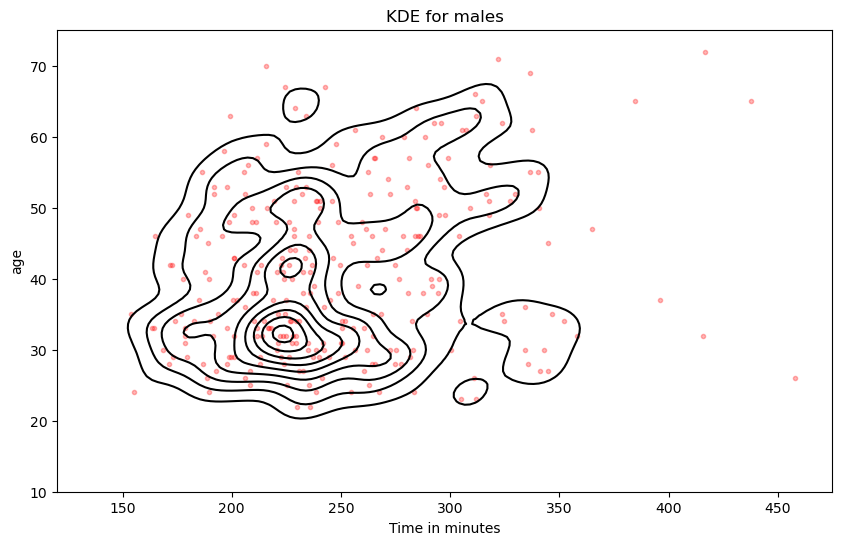

In [24]:
plt.figure(figsize=(10, 6))
x = np.linspace(120, 360, 100)
y = np.linspace(10, 70, 100)
X, Y = np.meshgrid(x, y)
Z = kdem(np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
plt.contour(X, Y, Z, levels=10, colors='k', zorder=10)
plt.plot(dfm["tot_minutes"], dfm["age"], 'r.', alpha=0.1)
plt.title('KDE for males')
plt.xlabel('Time in minutes')
plt.ylabel("age")

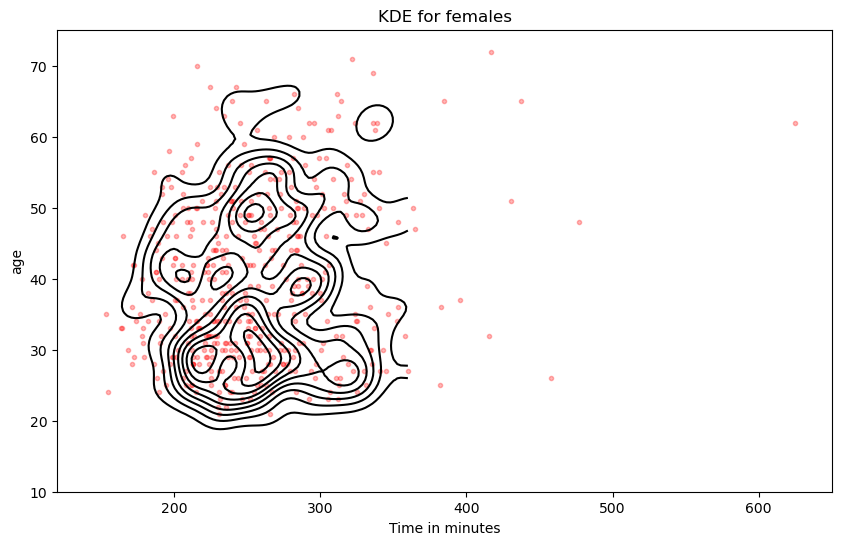

In [25]:
plt.figure(figsize=(10, 6))
x = np.linspace(120, 360, 100)
y = np.linspace(10, 70, 100)
X, Y = np.meshgrid(x, y)
Z = kdef(np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
plt.contour(X, Y, Z, levels=10, colors='k', zorder=10)
plt.plot(dff["tot_minutes"], dff["age"], 'r.', alpha=0.1)
plt.plot(dfm["tot_minutes"], dfm["age"], 'r.', alpha=0.1)
plt.title('KDE for females')
plt.xlabel('Time in minutes')
plt.ylabel("age");

My next step was to analyze how the predictions were being made for both genders, so i had graphed the lines showing the predictions for both genders

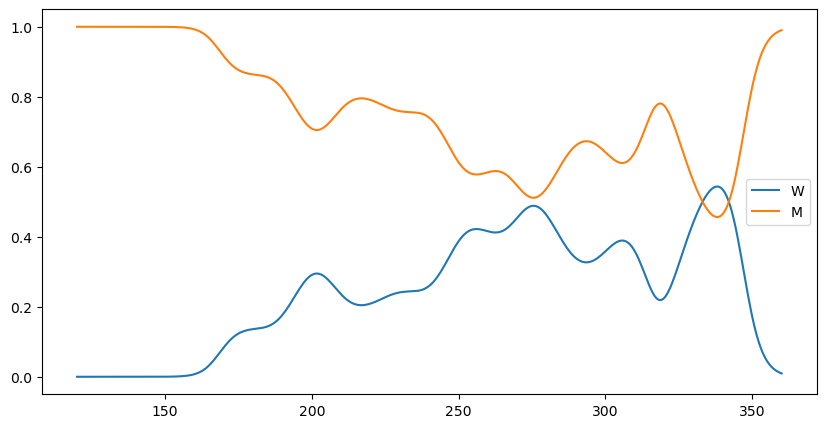

In [26]:
train_dfm = df[df["gender"] == "M"]
train_dff = df[df["gender"] == "W"]




kdem = gaussian_kde(train_dfm[["tot_minutes", "age"]].T, bw_method=0.2)
kdef = gaussian_kde(train_dff[["tot_minutes", "age"]].T, bw_method=0.2)


mc = len(train_dfm)
fc = len(train_dff)

prob_f = fc/(fc+mc)
prob_m = mc/(fc+mc)

def predictor_f(t,a):
    return (kdef([t,a])*prob_f)/(kdef([t,a])*prob_f + kdem([t,a])*prob_m)


def predictor_m(t,a):
    return (kdem([t,a])*prob_m)/(kdem([t,a])*prob_m + kdef([t,a])*prob_f)


x = np.linspace(120, 360, 400)
a = np.linspace(10, 70, 400)
plt.figure(figsize=(10, 5))
plt.plot(x, predictor_f(x,a), label = 'W')
plt.plot(x, predictor_m(x,a), label = 'M')
plt.legend()
plt.show()


It seems that there are certain age groups were the women would finish then men and vice versa. Causing the graphs to have complete opposite lines based on the genders.

I then added two new columns to my original data to show to predicted gender for each runner.

In [27]:
df["prob_F"] = predictor_f(df["tot_minutes"],df["age"])
df["prob_M"] = predictor_m(df["tot_minutes"],df["age"])
df.sample(10)

,id,first_name,last_name,gender,age,pace_per_mile,five_k,ten_k,fifteen_k,twenty_k,...,thirty_k,twenty_miles,thirty_five_k,forty_k,twenty_five_point_two_m,twenty_six_m,finish_time,tot_minutes,prob_F,prob_M
1316,1317,Ignacio,Tortajada,M,48,08:38,0:24:49,0:49:01,1:13:38,1:38:39,...,2:31:32,2:44:21,3:01:28,3:32:28,3:35:48,3:44:03,3:46:07,226.116667,0.303718,0.696282
381,382,Amnon,Pat,M,30,08:25,0:26:30,0:53:02,1:19:24,1:45:28,...,2:37:28,2:48:47,3:03:31,3:29:27,3:32:18,3:38:39,3:40:30,220.500000,0.346758,0.653242
334,335,Ethan,Taotafa,M,25,08:36,0:23:28,0:46:13,1:08:57,1:32:26,...,2:33:27,2:46:40,3:03:08,3:32:35,3:36:05,3:43:12,3:45:13,225.216667,0.524634,0.475366
972,973,Tara,Smith-Vera,W,49,09:36,0:27:47,0:55:31,1:24:26,1:54:16,...,2:56:46,3:10:30,3:27:52,3:58:43,4:02:12,4:09:40,4:11:36,251.600000,0.563541,0.436459
1319,1320,John,Junk,M,31,08:59,0:25:54,0:51:55,1:17:46,1:44:33,...,2:37:53,2:50:27,3:07:20,3:40:48,3:44:36,3:53:10,3:55:07,235.116667,0.330707,0.669293
475,476,Matthew,DiMarco,M,29,07:41,0:25:44,0:50:03,1:14:18,1:38:31,...,2:26:33,2:36:30,2:49:07,3:11:28,3:14:00,3:19:39,3:21:15,201.250000,0.314488,0.685512
1149,1150,Toshiaki,Taki,M,65,14:40,0:32:04,1:05:32,1:40:46,2:15:43,...,3:57:03,4:24:52,5:00:01,5:59:20,6:05:54,6:20:32,6:24:33,384.550000,0.000144,0.999856
884,885,David,Wolf,M,49,11:15,0:34:29,1:04:45,1:35:21,2:08:59,...,3:24:17,3:39:50,4:00:47,4:38:16,4:42:47,4:52:00,4:54:41,294.683333,0.380403,0.619597
22,23,Estelle van,Wijngeeren,W,26,11:19,0:32:14,1:04:02,1:37:00,2:11:53,...,3:24:27,3:40:40,4:01:43,4:40:33,4:44:43,4:53:53,4:56:20,296.333333,0.759869,0.240131
899,900,Claire,Schaffer,W,39,10:52,0:33:23,1:05:24,1:38:01,2:10:13,...,3:17:17,3:35:12,3:55:29,4:31:27,4:34:51,4:42:51,4:44:47,284.783333,0.531535,0.468465


Looking at a random sample from the data, we see the data accurately matching the gender. To get a clearly picture of how well the data is predicted, I calculated all the times the predictions were over 50% and matched the true gender divided by the amount of runners

In [28]:
sum((df["prob_F"] >= 0.5) == (df["gender"] == "W"))/len(df)

0.7142857142857143

In [29]:
sum((df["prob_M"] >= 0.5) == (df["gender"] == "M"))/len(df)

0.7121212121212122

It seems the algothrim has ~71% chance of correctly getting the gender of the runner based on the runtimes in the marathon